In [2]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

data_dir = '/Users/sabine/workspace/distconnect_macaque/data'
yerkes_dir = '/Users/sabine/data/Yerkes19'

df_r = pd.read_pickle('%s/df_regionwise.pkl' % data_dir)
df_p = pd.read_pickle('%s/df_pairwise.pkl' % data_dir)

In [3]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'incoming': "connectivity_distance"})

# analysis

### Support for excluding of TEpd

In [326]:
excl_areas = ['9', '10', '11', '12', '9_46d', '9_46v', '46d', '46v']#, 'TEpd'] 

fltr = df_r.area.isin(excl_areas)
fltr = (df_r.area.isin(excl_areas) | df_r.connectivity_distance.isnull())


model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.596
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     10.31
Date:                   Sun, 06 May 2018   Prob (F-statistic):           0.000224
Time:                           12:12:06   Log-Likelihood:                -62.186
No. Observations:                     25   AIC:                             132.4
Df Residuals:                         21   BIC:                             137.2
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [327]:
df_r['struct_resid'] = 999
df_r['struct_resid'][~fltr] = model.resid

df_r['struct_stud_resid'] = 999
df_r['struct_stud_resid'][~fltr] = model.outlier_test()['student_resid']

df_r['struct_unadj_p'] = 999
df_r['struct_unadj_p'][~fltr] = model.outlier_test()['unadj_p']

df_r['struct_bonf_p'] = 999
df_r['struct_bonf_p'][~fltr] = model.outlier_test()['bonf(p)']

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-pack

In [328]:
df_outl = df_r[['area', 'dist_inj_prim', 'connectivity_distance', 
                'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']][~fltr]

In [329]:
df_outl.sort_values(by='struct_stud_resid').head()

,area,dist_inj_prim,connectivity_distance,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
21,TEpd,27.890625,14.170338,-7.334426,-3.155292,0.004979,0.124463
45,7B,12.906250,16.025179,-3.249143,-1.099046,0.284803,1.000000
10,STPc,10.773438,15.879031,-3.257013,-1.083830,0.291334,1.000000
34,V1,0.000000,25.740364,-1.776673,-0.818829,0.422534,1.000000
62,ProM,8.804688,13.261428,-2.356696,-0.772335,0.448947,1.000000


In [330]:
df_outl.sort_values(by='struct_stud_resid').tail()

,area,dist_inj_prim,connectivity_distance,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
37,8m,12.531250,17.011166,2.405723,0.810544,0.427168,1.00000
29,8l,15.335938,17.645685,3.354480,1.167151,0.256877,1.00000
7,DP,22.078125,24.766858,3.572010,1.259785,0.222250,1.00000
47,5,10.250000,26.805691,5.141951,1.781326,0.090053,1.00000
39,7A,19.093750,28.055723,6.602615,2.526282,0.020073,0.50182


### Correcting connectivity distance values

In [356]:
# same as in func analysis, but also excluded lateral temporal cortex
excl_areas = ['9', '10', '11', '12', '9_46d', '9_46v', '46d', '46v', 'TEpd'] 

fltr = df_r.area.isin(excl_areas)
fltr = (df_r.area.isin(excl_areas) | df_r.connectivity_distance.isnull())

In [357]:
null = smf.ols(formula='connectivity_distance ~  location \
                                                 + region_size', data=df_r[~fltr]).fit()
print null.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.546
Model:                               OLS   Adj. R-squared:                  0.502
Method:                    Least Squares   F-statistic:                     12.61
Date:                   Sun, 06 May 2018   Prob (F-statistic):           0.000253
Time:                           12:14:30   Log-Likelihood:                -60.992
No. Observations:                     24   AIC:                             128.0
Df Residuals:                         21   BIC:                             131.5
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.31

In [358]:
df_r['corrected_condist'] = 999
df_r['corrected_condist'][~fltr] = null.resid + df_r.connectivity_distance[~fltr].mean()

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [359]:
model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.716
Model:                               OLS   Adj. R-squared:                  0.674
Method:                    Least Squares   F-statistic:                     16.83
Date:                   Sun, 06 May 2018   Prob (F-statistic):           1.08e-05
Time:                           12:14:32   Log-Likelihood:                -55.341
No. Observations:                     24   AIC:                             118.7
Df Residuals:                         20   BIC:                             123.4
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [360]:
df_r['struct_resid'] = 999
df_r['struct_resid'][~fltr] = model.resid

df_r['struct_stud_resid'] = 999
df_r['struct_stud_resid'][~fltr] = model.outlier_test()['student_resid']

df_r['struct_unadj_p'] = 999
df_r['struct_unadj_p'][~fltr] = model.outlier_test()['unadj_p']

df_r['struct_bonf_p'] = 999
df_r['struct_bonf_p'][~fltr] = model.outlier_test()['bonf(p)']

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-pack

In [361]:
df_r[['area', 'dist_inj_prim', 'connectivity_distance', 'corrected_condist', 
       'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']].head()

,area,dist_inj_prim,connectivity_distance,corrected_condist,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
0,V2,1.760742,27.339906,21.114016,1.991843,0.871484,0.394369,1.0
1,V3,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
2,V3A,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
3,V4,9.414062,21.862580,17.879756,-2.330104,-0.928346,0.364872,1.0
4,V4t,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0


# Combine func and struct

In [363]:
df_func = pd.read_pickle('./data/df_revrequest_outlcomp.pkl')

In [364]:
df_func.columns = ['area', 'condist', 'primdist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_func = df_func[['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']]
df_func['type'] = 'functional'
df_func.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,1,1.347755,7.371935,-0.076355,-0.016739,0.986689,1.0,functional
4,13,22.088094,7.813853,-7.047807,-1.586261,0.116832,1.0,functional
5,14,26.849069,13.059496,-3.503914,-0.797720,0.427519,1.0,functional
6,2,2.930141,7.664601,-0.349292,-0.076247,0.939423,1.0,functional
7,23,6.448689,9.042482,-0.229071,-0.049680,0.960508,1.0,functional


In [365]:
df_struct = df_r[['area', 'dist_inj_prim', 'corrected_condist', 
                  'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']][~fltr]
df_struct.columns = ['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_struct['type'] = 'structural'
df_struct.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,V2,1.760742,21.114016,1.991843,0.871484,0.394369,1.0,structural
3,V4,9.414062,17.879756,-2.330104,-0.928346,0.364872,1.0,structural
7,DP,22.078125,24.056607,1.900382,0.802132,0.432396,1.0,structural
8,STPr,8.320312,17.285067,-0.364394,-0.140128,0.890034,1.0,structural
9,STPi,8.437500,16.032966,-1.879756,-0.728553,0.475160,1.0,structural


In [366]:
df = pd.concat([df_func, df_struct])

In [367]:
df.tail()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
61,F5,3.525391,17.218986,0.736095,0.291631,0.773729,1.0,structural
62,ProM,8.804688,15.594382,-2.028724,-0.795069,0.436394,1.0,structural
65,8B,22.500000,18.790323,-2.567882,-1.124412,0.274844,1.0,structural
73,24c,24.703125,21.976710,-0.061297,-0.025708,0.979758,1.0,structural
77,F1,0.000000,18.742581,1.928887,0.776424,0.447057,1.0,structural


In [368]:
sns.set_style("whitegrid") 

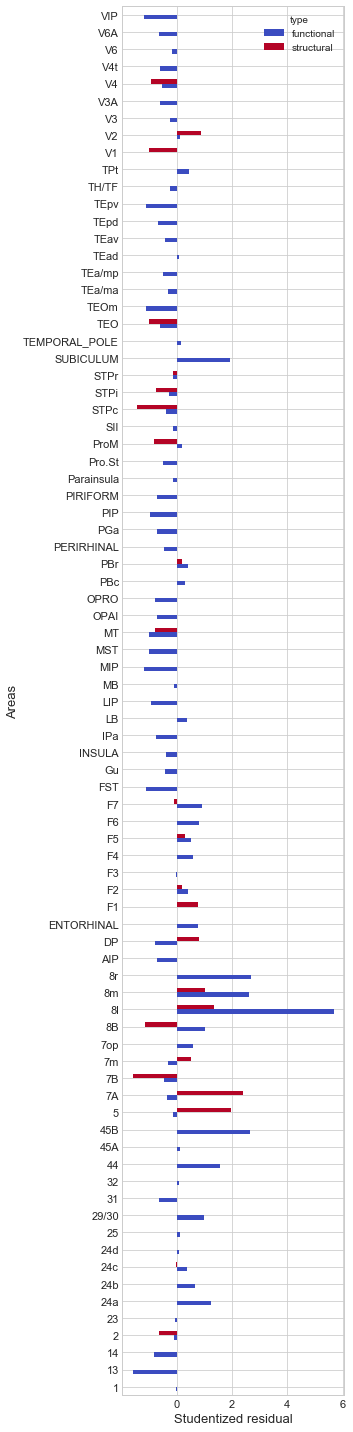

In [400]:
df.type.replace({'structural (corrected)': 'structural'}, inplace=True)

test = pd.pivot_table(df, index=['area'], columns='type', values='studentized residual')
ax = test.plot(kind='barh', figsize=(5, 20), fontsize=11, colormap='coolwarm')
_ = ax.set_ylabel('Areas', fontdict={'fontsize':13})
_ = ax.set_xlabel('Studentized residual', fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig('/Users/sabine/Downloads/suppl_residuals.png', dpi=300)

In [399]:
plt.savefig?

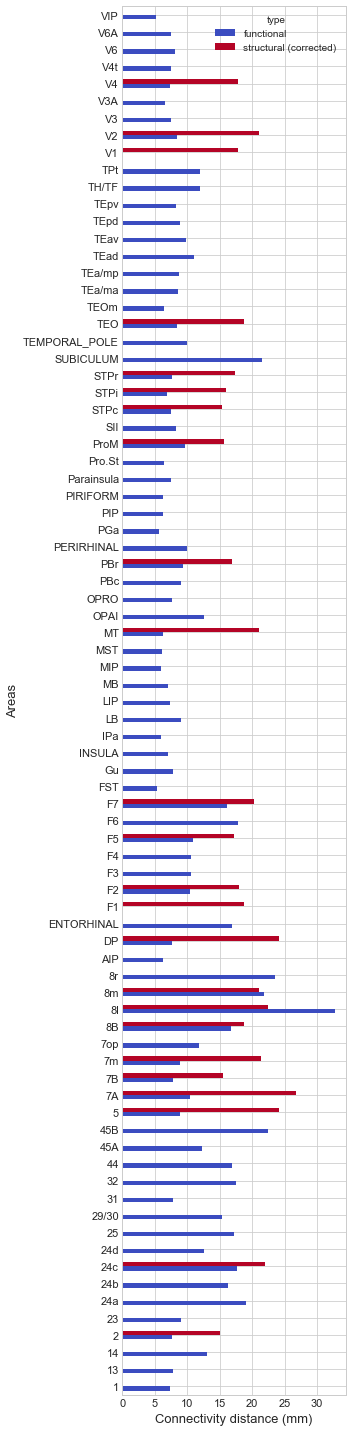

In [401]:
df.type.replace({'structural': 'structural (corrected)'}, inplace=True)
test = pd.pivot_table(df, index=['area'], columns='type', values='condist')
ax = test.plot(kind='barh', figsize=(5, 20), fontsize=11, colormap='coolwarm')
_ = ax.set_ylabel('Areas', fontdict={'fontsize':13})
_ = ax.set_xlabel('Connectivity distance (mm)', fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig('/Users/sabine/Downloads/suppl_condist_vals.png', dpi=300)